In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Load the dataset
data = pd.read_csv('../Dataset/Mall_Customers.csv')

# Preview the dataset
print(data.head())

# Encode Gender: Male = 0, Female = 1 (Optional for clustering)
data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'Male' else 1)

# Select features for clustering (Age and Annual Income)
X = data[['Age', 'Annual Income (k$)']].values

# Feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


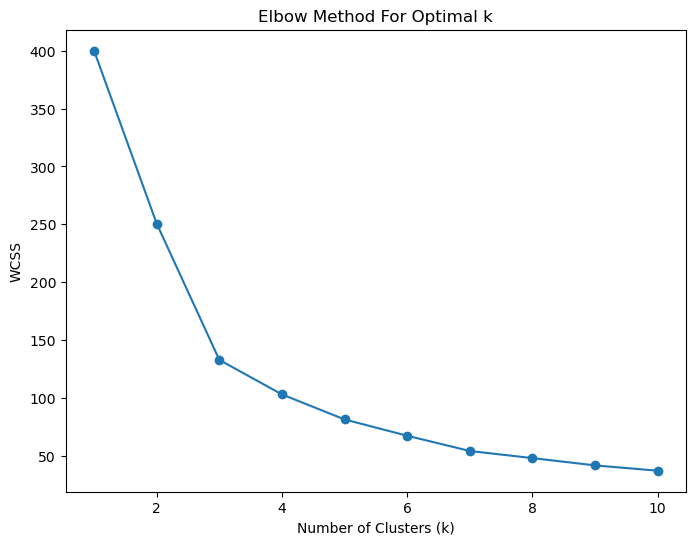

In [4]:
# Elbow Method to find the optimal k
wcss = []  # List to store the WCSS for each k
for k in range(1, 11):  # Try values of k from 1 to 10
    model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    model.fit(X_scaled)
    wcss.append(model.inertia_)  # Inertia is the WCSS (within-cluster sum of squares)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

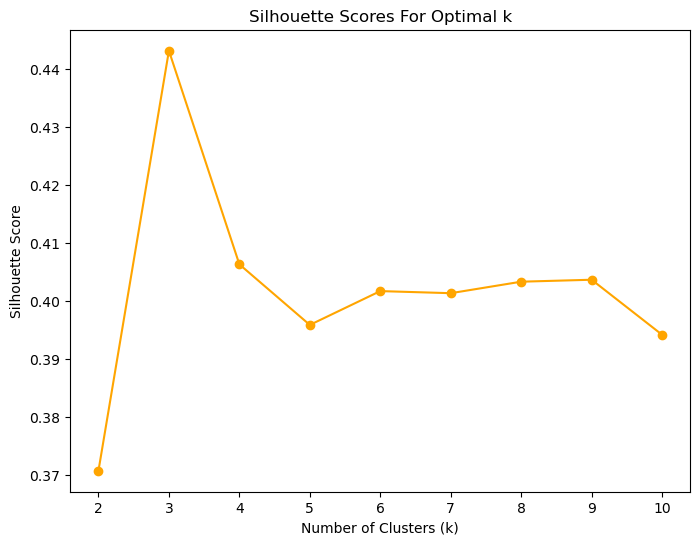

Silhouette Scores for each k:
k = 2, Score = 0.3707
k = 3, Score = 0.4431
k = 4, Score = 0.4063
k = 5, Score = 0.3958
k = 6, Score = 0.4017
k = 7, Score = 0.4013
k = 8, Score = 0.4033
k = 9, Score = 0.4036
k = 10, Score = 0.3941


In [5]:
# Silhouette Score to find the optimal k
silhouette_scores = []  # List to store silhouette scores for each k
for k in range(2, 11):  # Silhouette score cannot be calculated for k=1
    model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    model.fit(X_scaled)
    silhouette_score_val = silhouette_score(X_scaled, model.labels_)
    silhouette_scores.append(silhouette_score_val)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Print silhouette scores
print("Silhouette Scores for each k:")
for k, score in zip(range(2, 11), silhouette_scores):
    print(f'k = {k}, Score = {score:.4f}')

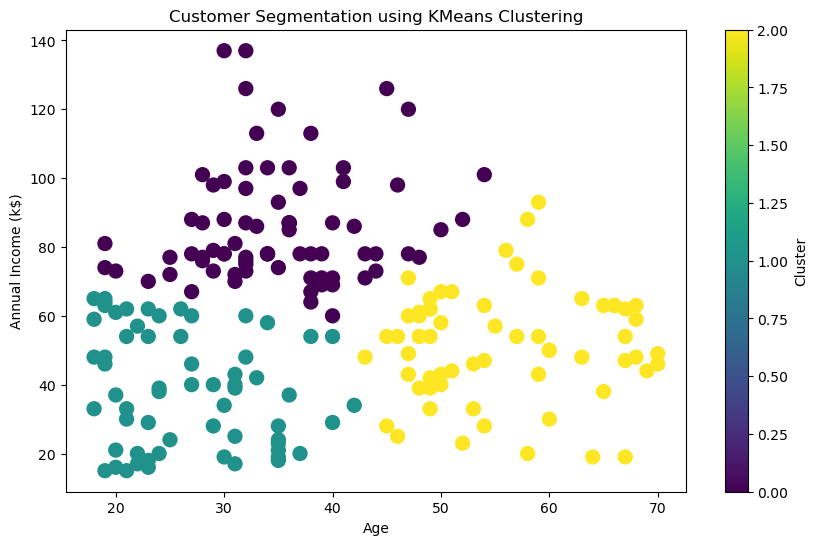

In [6]:
# Apply KMeans clustering to the dataset with optimal k (e.g., k=4)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Predict the cluster labels
y_pred = kmeans.predict(X_scaled)

# Add the predicted cluster labels to the original dataframe
data['Cluster'] = y_pred

# Visualizing the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Annual Income (k$)'], c=data['Cluster'], cmap='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segmentation using KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()